# Lösung einer DGL am Beispiel des Eulerverfahrens

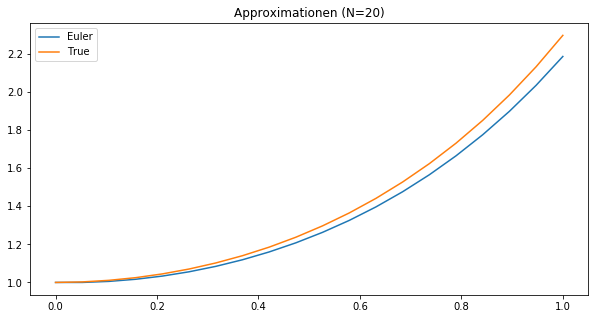

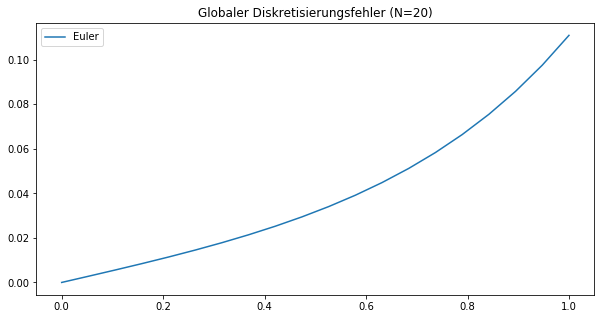

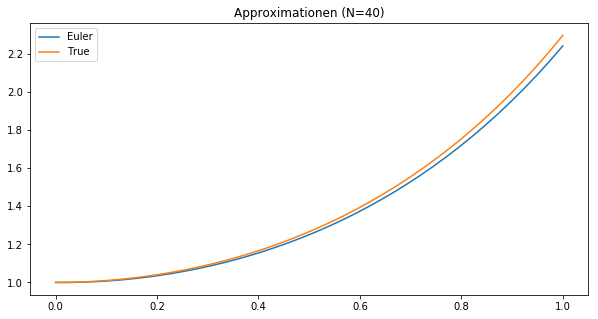

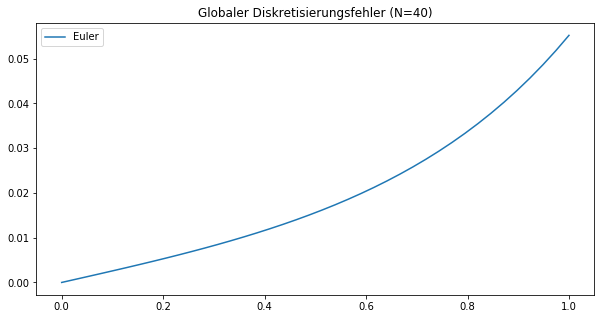

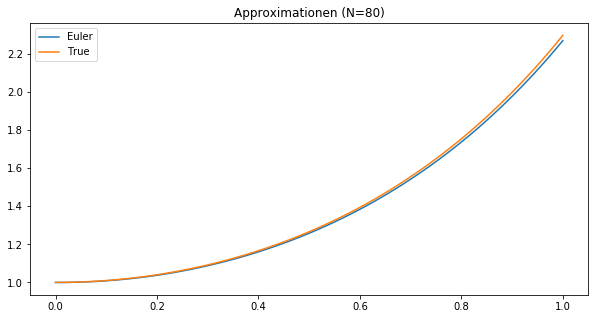

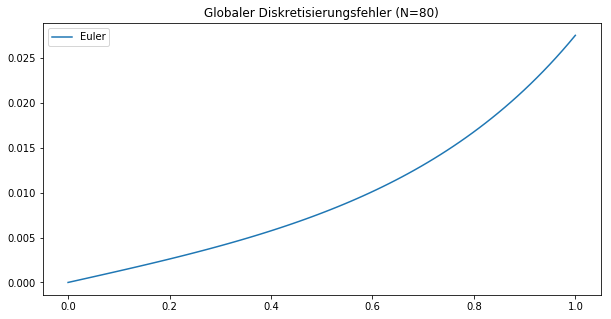

<Figure size 720x360 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
width=10
height=5
plt.rcParams['figure.figsize'] = [width, height]

def euler(f,t,y,h):
    return f(t,y)

def einschritt(f,y0,gitter,phi):
    n=len(gitter)
    y=np.zeros(n)
    y[0]=y0
    for i in range(0,n-1):
        h=gitter[i+1]-gitter[i]
        y[i+1]=y[i]+h*phi(f,gitter[i],y[i],h)
    return y

def true_solution(gitter):
    y=[-1+2*math.exp(t*t/2) for t in gitter]
    return y

def f(t,y):
    return t*y+t

def compare(N,a,b,f,y0):
    gitter1=np.linspace(a,b,N)
    gitter2=np.linspace(a,b,N//2)
    gitter4=np.linspace(a,b,N//4)
    yeuler=einschritt(f,y0,gitter1,euler)

    plt.plot(gitter1,yeuler)
    plt.plot(gitter1,true_solution(gitter1))
    plt.legend(['Euler','True'])
    plt.title('Approximationen (N='+str(N)+')')
    plt.figure()
    plt.plot(gitter1,np.abs(yeuler-true_solution(gitter1)))
    plt.legend(['Euler'])    
    plt.title('Globaler Diskretisierungsfehler (N='+str(N)+')')
    plt.figure()
#    plt.semilogy(gitter1,np.abs(yeuler-true_solution(gitter1)))
#    plt.legend(['Euler'])    
#    plt.title('Globaler Diskretisierungsfehler (log) (N='+str(N)+')')
#    plt.figure()
    
compare(20,0,1,f,1)
compare(40,0,1,f,1)
compare(80,0,1,f,1)